In [7]:
import pandas as pd

# Load customer demographics data
customer_demo_df = pd.read_excel('customer_demographics.xlsx')

# Load customer address data
customer_address_df = pd.read_excel('customer_address.xlsx')

# Load transaction history data
transaction_history_df = pd.read_excel('transactions.xlsx')

# Load new customer demographics data
new_customer_demo_df = pd.read_excel('new_customer_list.xlsx')


C:\Users\Hp\AppData\Local\Temp/ipykernel_11668/1714636120.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customer_demo_df = pd.read_excel('customer_demographics.xlsx')
C:\Users\Hp\AppData\Local\Temp/ipykernel_11668/1714636120.py:13: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  new_customer_demo_df = pd.read_excel('new_customer_list.xlsx')


In [8]:
# Drop rows with missing values in 'date_of_birth' and 'gender' columns in customer demographics dataset
customer_demo_df.dropna(subset=['DOB', 'gender'], inplace=True)

# Drop rows with missing values in 'address' column in customer address dataset
customer_address_df.dropna(subset=['postcode'], inplace=True)

# Drop rows with missing values in 'transaction_amount' column in transaction history dataset
transaction_history_df.dropna(subset=['customer_id', 'list_price'], inplace=True)

# Drop rows with missing values in 'date_of_birth' and 'gender' columns in new customer demographics dataset
new_customer_demo_df.dropna(subset=['DOB', 'gender', 'postcode'], inplace=True)


In [9]:
import pandas as pd

# Load customer demographics dataset
customer_demo_df = pd.read_excel('customer_demographics.xlsx')

# Load customer address dataset
customer_address_df = pd.read_excel('customer_address.xlsx')

# Load transactions dataset
transactions_df = pd.read_excel('transactions.xlsx')

# Perform inner join on customer ID to merge customer demographics and customer address datasets
merged_df = pd.merge(customer_demo_df, customer_address_df, on='customer_id', how='inner')

# Perform inner join on customer ID to merge merged_df with transactions dataset
master_df = pd.merge(merged_df, transactions_df, on='customer_id', how='inner')

# Print the first few rows of the master dataset
print(master_df.head())


C:\Users\Hp\AppData\Local\Temp/ipykernel_11668/3038843747.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customer_demo_df = pd.read_excel('customer_demographics.xlsx')


   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            1    Laraine  Medendorp  Female   
2            1    Laraine  Medendorp  Female   
3            1    Laraine  Medendorp  Female   
4            1    Laraine  Medendorp  Female   

   past_3_years_bike_related_purchases        DOB   Age            job_title  \
0                                   93 1953-10-12  69.0  Executive Secretary   
1                                   93 1953-10-12  69.0  Executive Secretary   
2                                   93 1953-10-12  69.0  Executive Secretary   
3                                   93 1953-10-12  69.0  Executive Secretary   
4                                   93 1953-10-12  69.0  Executive Secretary   

  job_industry_category wealth_segment  ... transaction_date online_order  \
0                Health  Mass Customer  ...       2017-12-23          0.0   
1                Health  Mass Customer  ...       2017-04-06          1.0   

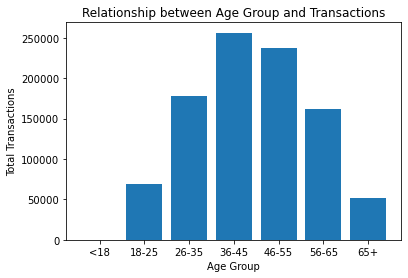

In [11]:
import matplotlib.pyplot as plt

# Create age brackets
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
master_df['age_group'] = pd.cut(master_df['Age'], bins=bins, labels=labels)

# Group the data by age group and calculate total transactions for each age group
age_group_transactions = master_df.groupby('age_group')['past_3_years_bike_related_purchases'].sum()

# Create a bar graph
plt.bar(age_group_transactions.index, age_group_transactions.values)
plt.xlabel('Age Group')
plt.ylabel('Total Transactions')
plt.title('Relationship between Age Group and Transactions')
plt.show()


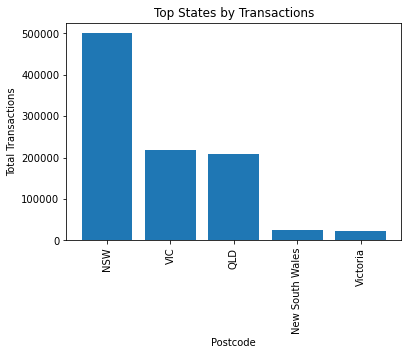

In [19]:
import matplotlib.pyplot as plt

# Group the data by postcode and calculate total transactions for each postcode
postcode_transactions = master_df.groupby('state')['past_3_years_bike_related_purchases'].sum()

# Sort the postcode_transactions in descending order
sorted_postcodes = postcode_transactions.sort_values(ascending=False)

# Select top 15 postcodes with the most number of transactions
top_15_postcodes = sorted_postcodes.head(15)

# Create a bar graph
plt.bar(top_15_postcodes.index, top_15_postcodes.values)
plt.xlabel('Postcode')
plt.ylabel('Total Transactions')
plt.title('Top States by Transactions')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()




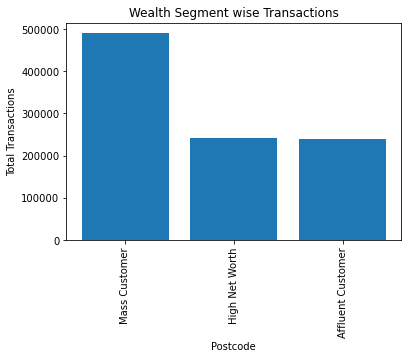

In [22]:
import matplotlib.pyplot as plt

# Group the data by postcode and calculate total transactions for each postcode
postcode_transactions = master_df.groupby('wealth_segment')['past_3_years_bike_related_purchases'].sum()

# Sort the postcode_transactions in descending order
sorted_postcodes = postcode_transactions.sort_values(ascending=False)

# Select top 15 postcodes with the most number of transactions
top_15_postcodes = sorted_postcodes.head(15)

# Create a bar graph
plt.bar(top_15_postcodes.index, top_15_postcodes.values)
plt.xlabel('Postcode')
plt.ylabel('Total Transactions')
plt.title('Wealth Segment wise Transactions')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by postcode and calculate total transactions for each postcode
postcode_transactions = master_df.groupby('wealth_segment')['past_3_years_bike_related_purchases'].sum()

# Sort the postcode_transactions in descending order
sorted_postcodes = postcode_transactions.sort_values(ascending=False)

# Select top 15 postcodes with the most number of transactions
top_15_postcodes = sorted_postcodes.head(15)

# Create a bar graph
plt.bar(top_15_postcodes.index, top_15_postcodes.values)
plt.xlabel('Postcode')
plt.ylabel('Total Transactions')
plt.title('Wealth Segment wise Transactions')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

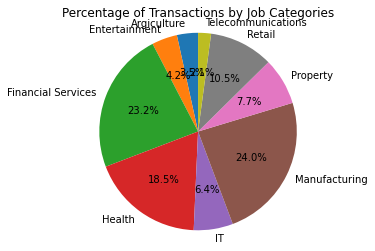

In [23]:
import matplotlib.pyplot as plt

# Group the data by job categories and count the number of transactions for each category
job_transactions = master_df.groupby('job_industry_category')['past_3_years_bike_related_purchases'].count()

# Create a pie chart
plt.pie(job_transactions, labels=job_transactions.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Transactions by Job Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


In [6]:
# Save master_df as CSV file
master_df.to_csv('master_data.csv', index=False)


In [14]:
import pandas as pd

# Assuming master_df already exists with customer demographics data
# and it contains 'customer_id' and 'age' columns

# Define age brackets
age_bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']

# Add age bracket column
master_df['age_bracket'] = pd.cut(master_df['Age'], bins=age_bins, labels=age_labels)

# Generate count of unique customer IDs in each age bracket
age_bracket_counts = master_df['customer_id'].groupby(master_df['age_bracket']).nunique()

# Print the result
print(age_bracket_counts)


age_bracket
<18        0
18-25    244
26-35    608
36-45    908
46-55    860
56-65    602
66-75    185
75+        5
Name: customer_id, dtype: int64


In [15]:
# Save master_df as CSV file
master_df.to_csv('master_data_2.csv', index=False)


In [16]:
import pandas as pd

# Assuming master_df already exists with customer demographics data
# and it contains 'customer_id' and 'age_bracket' columns

# Generate count of unique customer IDs in each age bracket
age_bracket_counts = master_df['customer_id'].groupby(master_df['age_bracket']).nunique()

# Create a new dataframe from the resulting Series
age_bracket_df = pd.DataFrame({'age_bracket': age_bracket_counts.index, 'customer_count': age_bracket_counts.values})

# Print the resulting dataframe
print(age_bracket_df)


  age_bracket  customer_count
0         <18               0
1       18-25             244
2       26-35             608
3       36-45             908
4       46-55             860
5       56-65             602
6       66-75             185
7         75+               5


In [18]:
# Save master_df as CSV file
#KMPG internship ends here
master_df.to_csv('master_data_2.csv', index=False)

In [19]:
#Tata virtual internship begins here

import pandas as pd

# Load the online retail dataset into a pandas DataFrame
df = pd.read_excel('Online Retail.xlsx')

# Drop rows where customer ID is blank
df.dropna(subset=['CustomerID'], inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print(df.head)


<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
406824    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
406825    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
406826    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
406827    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
406828    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Revenu

In [20]:
# Update quantity column where value is below 1 to 1
df['Quantity'] = df['Quantity'].apply(lambda x: 1 if x < 1 else x)


In [21]:
# Update UnitPrice column where value is below 0 to 0
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: 0 if x < 0 else x)


In [22]:
df.describe()

,Quantity,UnitPrice,Revenue,CustomerID
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.758680,3.460471,20.401854,15287.690570
std,178.443359,69.315162,427.591718,1713.600303
min,1.000000,0.000000,-168469.600000,12346.000000
25%,2.000000,1.250000,4.200000,13953.000000
50%,5.000000,1.950000,11.100000,15152.000000
75%,12.000000,3.750000,19.500000,16791.000000
max,80995.000000,38970.000000,168469.600000,18287.000000


In [23]:
df.to_csv('online_retail_cleaned.csv', index=False)

In [24]:
# Group by 'Country' and calculate the sum of 'Revenue' for each country
revenue_by_country = df.groupby('Country')['Revenue'].sum()

# Sort the revenue_by_country Series in descending order
revenue_by_country = revenue_by_country.sort_values(ascending=False)

# Exclude 'United Kingdom' from the top 10 countries
top_10_countries = revenue_by_country[revenue_by_country.index != 'United Kingdom'].head(10)

# Print the top 10 countries with the most revenue (excluding 'United Kingdom')
print(top_10_countries)


Country
Netherlands    284661.54
EIRE           250285.22
Germany        221698.21
France         196712.84
Australia      137077.27
Switzerland     55739.40
Spain           54774.58
Belgium         40910.96
Sweden          36595.91
Japan           35340.62
Name: Revenue, dtype: float64


In [25]:

# Group by 'CustomerID' and calculate the sum of 'Revenue' for each customer
revenue_by_customer = df.groupby('CustomerID')['Revenue'].sum()

# Sort the revenue_by_customer Series in descending order
revenue_by_customer = revenue_by_customer.sort_values(ascending=False)

# Filter out the top 10 customers with the highest revenue
top_10_customers = revenue_by_customer.head(10)

# Print the top 10 customers with the highest revenue
print(top_10_customers)


CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Revenue, dtype: float64


In [1]:
# Accenture virtual internship

import pandas as pd

# Load the 'Reactions' dataset into a DataFrame
df = pd.read_csv('Reactions.csv')

# Drop rows with missing values
df = df.dropna()

# Drop the 'Datetime' column
df = df.drop('Datetime', axis=1)

# Reset the index
df = df.reset_index(drop=True)

# Display the resulting DataFrame
print(df.head())


   Unnamed: 0                            Content ID  \
0           1  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           2  97522e57-d9ab-4bd6-97bf-c24d952602d2   
2           3  97522e57-d9ab-4bd6-97bf-c24d952602d2   
3           4  97522e57-d9ab-4bd6-97bf-c24d952602d2   
4           5  97522e57-d9ab-4bd6-97bf-c24d952602d2   

                                User ID        Type  
0  5d454588-283d-459d-915d-c48a2cb4c27f     disgust  
1  92b87fa5-f271-43e0-af66-84fac21052e6     dislike  
2  163daa38-8b77-48c9-9af6-37a6c1447ac2      scared  
3  34e8add9-0206-47fd-a501-037b994650a2     disgust  
4  9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4  interested  


In [2]:
df.to_csv('Reactions_cleaned.csv', index=False)

In [3]:
# Load the 'Content' dataset into a DataFrame
df = pd.read_csv('Content.csv')

# Drop rows with missing values
df = df.dropna()

# Drop the 'Datetime' column
df = df.drop('URL', axis=1)

# Remove quotes from words within quotes in the 'Category' column
df['Category'] = df['Category'].str.replace(r'"(.*?)"', r'\1')

# Capitalize the first alphabet of all words in the 'Category' column
df['Category'] = df['Category'].str.title()

# Display the resulting DataFrame
print(df.head())

# Reset the index
df = df.reset_index(drop=True)

# Display the resulting DataFrame
print(df.head())

   Unnamed: 0                            Content ID  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810   
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f   
3           3  356fff80-da4d-4785-9f43-bc1261031dc6   
4           4  01ab84dd-6364-4236-abbb-3f237db77180   

                                User ID   Type        Category  
0  8d3cd87d-8a31-4935-9a4f-b319bfe05f31  photo        Studying  
1  beb1f34e-7870-46d6-9fc7-2e12eb83ce43  photo  Healthy Eating  
2  a5c65404-5894-4b87-82f2-d787cbee86b4  photo  Healthy Eating  
3  9fb4ce88-fac1-406c-8544-1a899cee7aaf  photo      Technology  
4  e206e31b-5f85-4964-b6ea-d7ee5324def1  video            Food  
   Unnamed: 0                            Content ID  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810   
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f   
3           3  356fff80-da4d-4785-9f43-bc1261031dc6   
4   

C:\Users\Hp\AppData\Local\Temp/ipykernel_13492/592826643.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Category'] = df['Category'].str.replace(r'"(.*?)"', r'\1')


In [4]:
df.to_csv('Content_cleaned.csv', index=False)

In [6]:
import pandas as pd

# Load the 'Reactions' and 'ReactionTypes' datasets into separate DataFrames
df_reactions = pd.read_csv('Reactions.csv', header=1)
df_reaction_types = pd.read_csv('ReactionTypes.csv')

# Merge the two DataFrames based on the 'Reaction Type' column
merged_df = pd.merge(df_reactions, df_reaction_types, on='Reaction Type', how='left')

# Display the merged DataFrame
print(merged_df.head())


KeyError: 'Reaction Type'

In [2]:
#Quantium internship begins here

import pandas as pd

# read in the first dataframe
df1 = pd.read_excel('QVI_transaction_data.xlsx')

# read in the second dataframe
df2 = pd.read_csv('QVI_purchase_behaviour.csv')

# merge the two dataframes on the 'LYLTY_CARD_NBR' column
merged_df = pd.merge(df1, df2, on='LYLTY_CARD_NBR')

# display the merged dataframe
print(merged_df.head())


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2018-11-10          1            1307     346        96   
3 2019-03-09          1            1307     347        54   
4 2019-05-20          1            1343     383        61   

                                PROD_NAME  PROD_QTY  TOT_SALES  \
0  Natural Chip        Compny SeaSalt175g         2        6.0   
1                CCs Nacho Cheese    175g         3        6.3   
2          WW Original Stacked Chips 160g         2        3.8   
3                       CCs Original 175g         1        2.1   
4  Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  
4  MIDAGE S

In [3]:
merged_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
merged_df.to_csv('transaction_merged.csv', index=False)

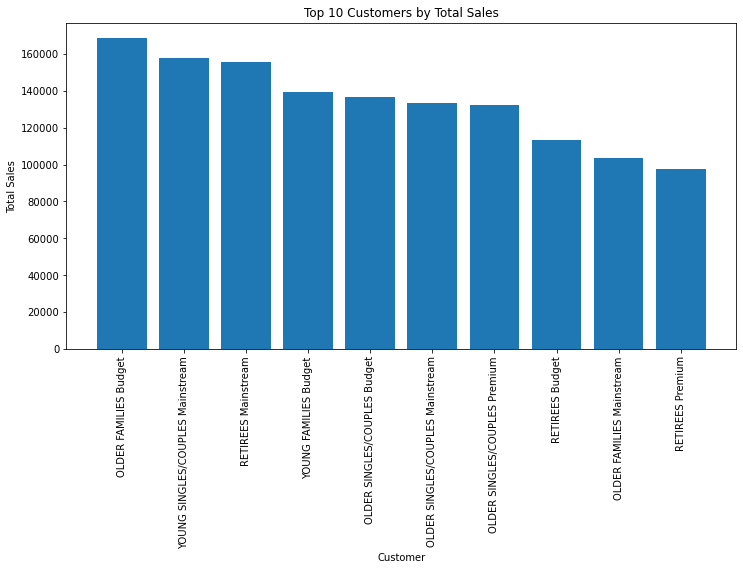

In [12]:
#Which customer segments have the highest total sales?
#Which customer segments have the highest total quantity purchased?
#Which products are these customer segments purchasing? 

import pandas as pd
import matplotlib.pyplot as plt

# load the merged dataframe
transaction_merged = pd.read_excel("transaction_merged.xlsx")

# group by LIFESTAGE and PREMIUM_CUSTOMER and sum the total sales
sales_by_customer = transaction_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# sort by TOT_SALES in descending order
sorted_sales = sales_by_customer.sort_values('TOT_SALES', ascending=False)

# get the top 10 values
top_10_sales = sorted_sales.head(10)

# create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_10_sales['LIFESTAGE'] + ' ' + top_10_sales['PREMIUM_CUSTOMER'], top_10_sales['TOT_SALES'])
plt.xticks(rotation=90)
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Total Sales')
plt.show()


In [13]:
prod_summary = transaction_merged.groupby('PROD_NAME').agg({'PROD_QTY': 'sum', 'TOT_SALES': 'sum'}).reset_index()

# view the summary dataframe
print(prod_summary)

                                  PROD_NAME  PROD_QTY  TOT_SALES
0                         Burger Rings 220g      2970     6831.0
1                  CCs Nacho Cheese    175g      2839     5961.9
2                         CCs Original 175g      2880     6048.0
3                  CCs Tasty Cheese    175g      2890     6069.0
4            Cheetos Chs & Bacon Balls 190g      2801     9243.3
..                                      ...       ...        ...
109  WW Sour Cream &OnionStacked Chips 160g      2802     5323.8
110     WW Supreme Cheese   Corn Chips 200g      2837     5390.3
111          Woolworths Cheese   Rings 190g      2872     5169.6
112          Woolworths Medium   Salsa 300g      2700     4050.0
113          Woolworths Mild     Salsa 300g      2823     4234.5

[114 rows x 3 columns]


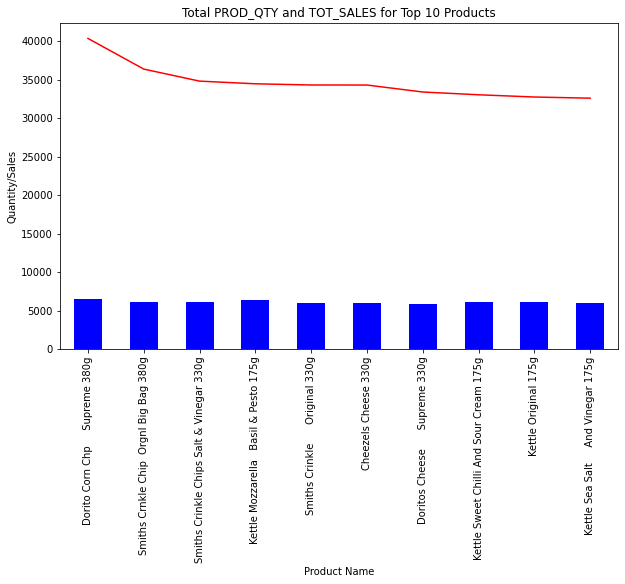

In [16]:
# Group the data by 'PROD_NAME' and aggregate the sum of 'PROD_QTY' and 'TOT_SALES'
grouped_df = transaction_merged.groupby('PROD_NAME').agg({'PROD_QTY': 'sum', 'TOT_SALES': 'sum'})

# Sort the values in descending order by 'TOT_SALES' and select the top 10
top_10_df = grouped_df.sort_values(by='TOT_SALES', ascending=False).head(10)

# Create a bar plot of 'PROD_QTY' for the top 10 'PROD_NAME'
ax = top_10_df['PROD_QTY'].plot(kind='bar', figsize=(10, 6), color='blue')

# Create a line plot of 'TOT_SALES' for the top 10 'PROD_NAME'
top_10_df['TOT_SALES'].plot(kind='line', color='red', ax=ax)

# Set the title and axis labels
plt.title('Total PROD_QTY and TOT_SALES for Top 10 Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity/Sales')
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [19]:
# Assuming that the date column is named 'DATE' in your dataframe
transaction_merged['MONTH'] = pd.to_datetime(transaction_merged['DATE']).dt.month

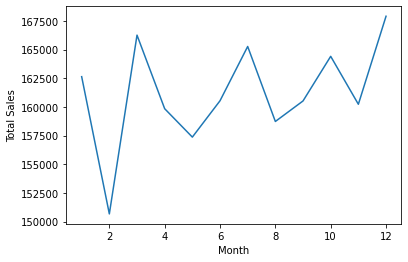

In [21]:
# Group the data by month and sum the total sales for each month
monthly_sales = transaction_merged.groupby('MONTH')['TOT_SALES'].sum()

# Plot the total sales by month
plt.plot(monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()